<a href="https://colab.research.google.com/github/markumreed/colab_sklearn/blob/main/logistic_regression_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with Python

- Predict a classification- survival or deceased. 
- Implemente Logistic Regression in Python for classification.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
titanic = sns.load_dataset("titanic")

# EDA
## Missing Data

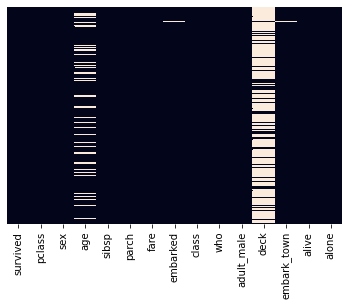

In [22]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False);

In [23]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [24]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

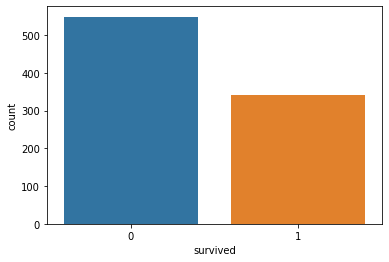

In [25]:
sns.countplot(x="survived", data=titanic);

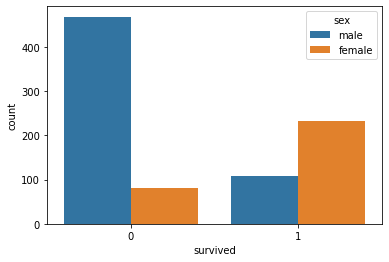

In [26]:
sns.countplot(x="survived", hue="sex", data=titanic);

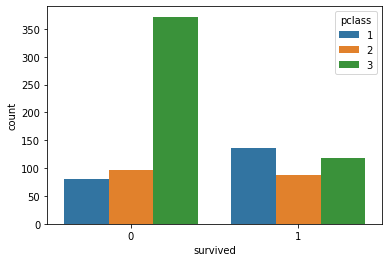

In [27]:
sns.countplot(x="survived", hue="pclass", data=titanic);

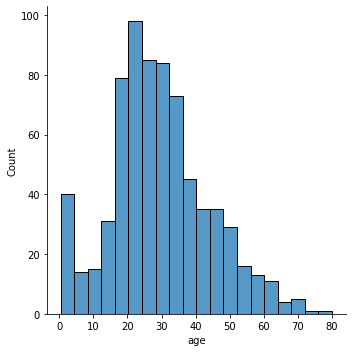

In [29]:
sns.displot(titanic['age'].dropna());

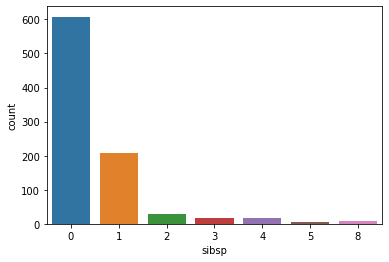

In [30]:
sns.countplot(x="sibsp", data=titanic);

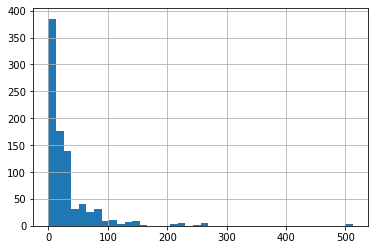

In [32]:
titanic['fare'].hist(bins=40);

## Data Cleaning
- Age
- How to fill in the data?
  1. Fill with the mean (imput)
  1. Fill with mean by class (?)

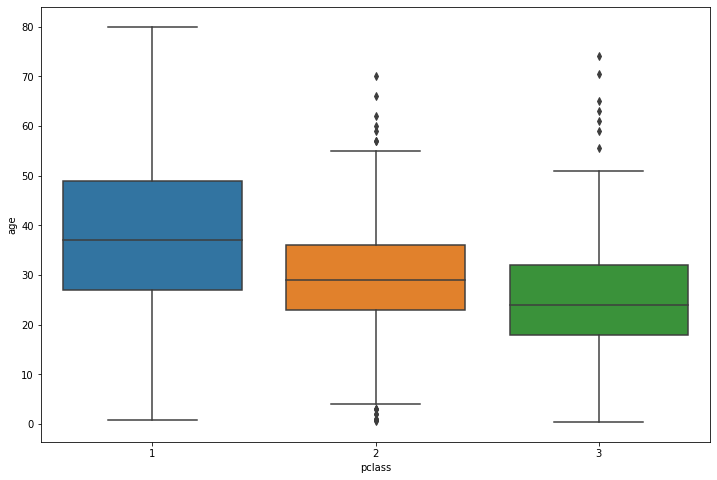

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="pclass", y="age", data=titanic);

In [37]:
## Impute avg age based on pclass
# pclass 1 == 37
# pclass 2 == 29
# pclass 3 == 24
def impute_age(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return 37
    elif pclass == 2:
      return 29
    else:
      return 24
  else:
    return age

In [35]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [60]:
titanic['age'] = titanic[['age', 'pclass']].apply(impute_age, axis=1)

In [39]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [61]:
titanic.drop(['deck', 'embark_town', 'alive', 'alone', 'adult_male', 'who'], axis=1,inplace=True)

In [43]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,22.0,1,0,7.2500,S,Third
1,1,1,female,38.0,1,0,71.2833,C,First
2,1,3,female,26.0,0,0,7.9250,S,Third
3,1,1,female,35.0,1,0,53.1000,S,First
4,0,3,male,35.0,0,0,8.0500,S,Third


In [62]:
titanic.drop('class', axis=1, inplace=True)

In [45]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [46]:
titanic.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

In [63]:
titanic.dropna(inplace=True)

In [48]:
titanic.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

# Dealing with Categoricals

In [49]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    object 
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [64]:
sex = pd.get_dummies(titanic['sex'], drop_first=True)
embark = pd.get_dummies(titanic['embarked'], drop_first=True) # DROP FIRST IS IMPORTANT!!!

In [52]:
titanic['embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: embarked, dtype: object

In [53]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [55]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [65]:
titanic.drop(['sex', 'embarked'], axis=1, inplace=True)

In [66]:
titanic_full = pd.concat([titanic, sex, embark], axis=1)

In [68]:
titanic_full.head()

,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression Model

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Training/Prediction

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lgm = LogisticRegression()
lgm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
predictions = lgm.predict(X_test)

# Evaluation


In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       184
           1       0.68      0.51      0.58       110

    accuracy                           0.73       294
   macro avg       0.71      0.68      0.69       294
weighted avg       0.72      0.73      0.72       294



- Feature engineering in the future
- Look at passanger names
- Look for other information